In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [7]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

In [8]:
# Provide complete file paths to your base and testing images with escaped backslashes
base_image_path = 'C:\\Users\\Muhammad Kamran\\Desktop\\CVA1\\Baseimage.jpg'
testing_images_folder = 'C:\\Users\\Muhammad Kamran\\Desktop\\CVA1\\Testing Images\\'

In [9]:
# Read the base image
base_image = cv2.imread(base_image_path)

if base_image is None:
    print("Error: Unable to read the base image.")
else:
    # Resize base image to a common size if necessary
    width = 200  # Set a common width for resizing
    height = 200  # Set a common height for resizing
    base_image_resized = cv2.resize(base_image, (width, height))
    
    # Convert base image to grayscale for comparison
    base_gray = cv2.cvtColor(base_image_resized, cv2.COLOR_BGR2GRAY)

    # Initialize lists to store comparison results
    similarity_scores = []
    compared_images = []

In [12]:
# Assuming you have imported the required libraries and defined variables like base_gray, width, height, testing_images_folder, etc.

# Calculate SSIM for each testing image
for i in range(1, 21):
    testing_image_path = testing_images_folder + f'Testimage{i}.jpg'
    testing_image = cv2.imread(testing_image_path)
    
    if testing_image is not None:
        # Resize testing image to a common size if necessary
        testing_image_resized = cv2.resize(testing_image, (width, height))
        
        # Convert testing image to grayscale for comparison
        testing_gray = cv2.cvtColor(testing_image_resized, cv2.COLOR_BGR2GRAY)
        
        # Calculate Structural Similarity Index (SSI)
        ssi_index, _ = ssim(base_gray, testing_gray, full=True)
        
        # Calculate the percentage of similarity
        similarity_percentage = ssi_index * 100
        
        # Store comparison results
        similarity_scores.append(similarity_percentage)
        compared_images.append((base_image_resized, testing_image_resized))
    else:
        print(f"Error: Unable to read testing image Testimage{i}.jpg")


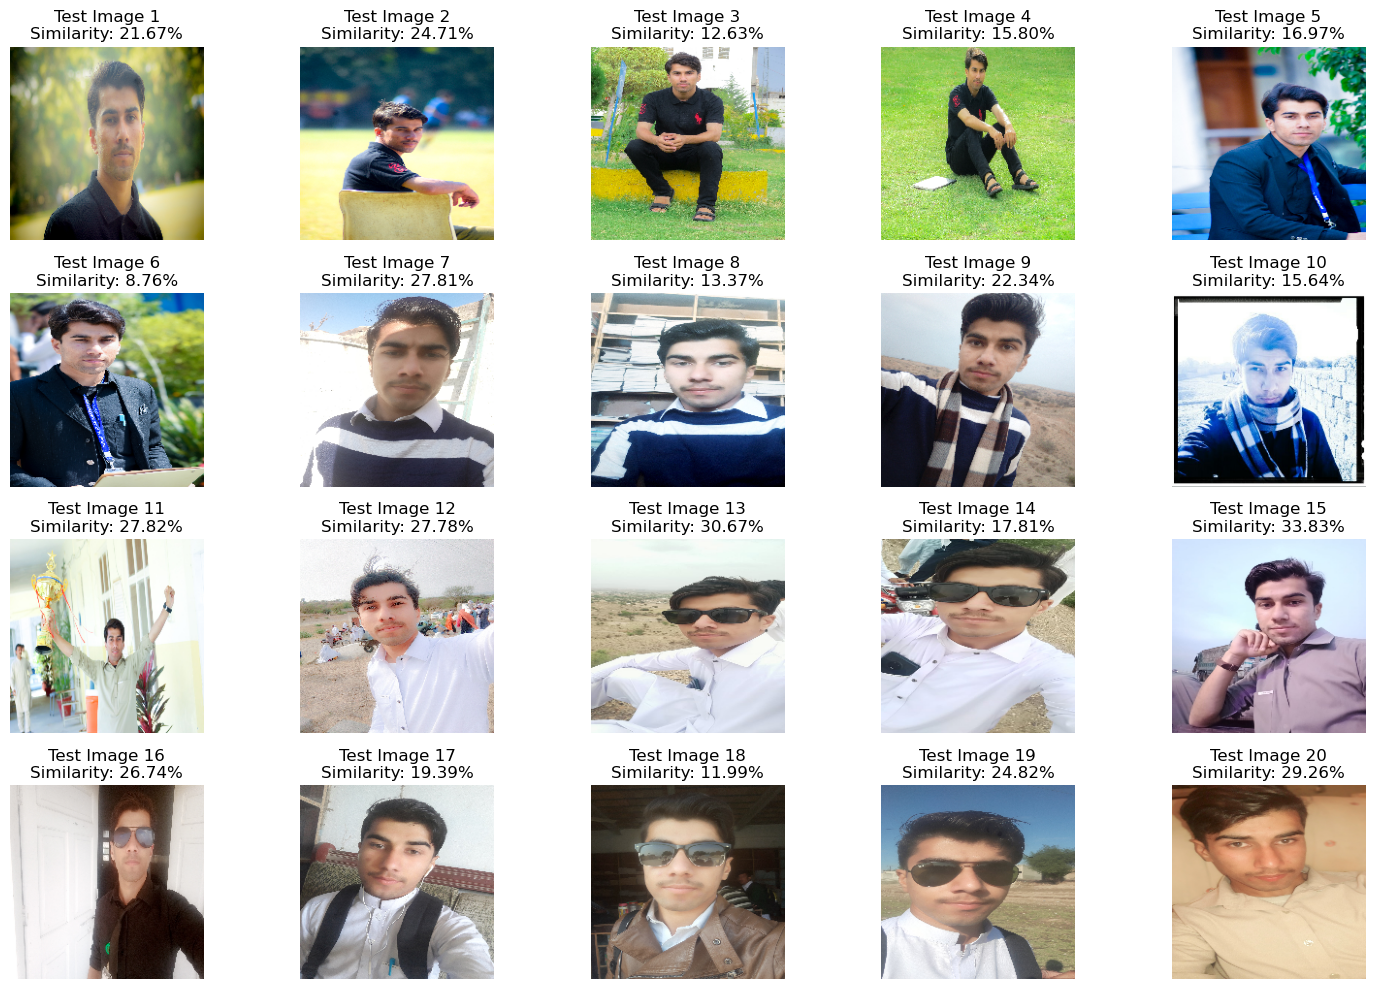

In [14]:
# Display all comparisons in a single window
plt.figure(figsize=(15, 10))
columns = 5  # Number of columns in the grid
rows = 4  # Number of rows in the grid

for i in range(len(compared_images)):
    plt.subplot(rows, columns, i + 1)
    plt.imshow(cv2.cvtColor(compared_images[i][1], cv2.COLOR_BGR2RGB))
    plt.title(f'Test Image {i + 1}\nSimilarity: {similarity_scores[i]:.2f}%')
    plt.axis('off')

plt.tight_layout()
plt.show()
